In [1]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import gmaps
import os
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import g_key

# Save path to csv file in a variable
data_file="../Resources/AustraliaDataScienceJobs.csv"

# Read data file using pandas library
data_file_df=pd.read_csv(data_file,encoding="UTF-8")

# Display dataframe
df=pd.DataFrame(data_file_df)
df.head()

,Job Title,Job Location,Company,Url,Estimate Base Salary,Low Estimate,High Estimate,Company Size,Company Type,Company Sector,...,cassandra_yn,hive_yn,bigml_yn,tableau_yn,powerbi_yn,nlp_yn,pytorch_yn,tensorflow_yn,mathematic_yn,statistic_yn
0,Analyst,Melbourne,ANZ Banking Group,https://www.glassdoor.com.au/partner/jobListin...,95917,80000,115000,10000+ Employees,Company - Public,Finance,...,0,0,0,0,0,0,0,0,1,0
1,Clinical Research Associate,Mulgrave,Bristol Myers Squibb,https://www.glassdoor.com.au/partner/jobListin...,96555,79000,118000,10000+ Employees,Company - Public,Pharmaceutical & Biotechnology,...,0,0,0,0,0,0,0,0,0,0
2,Clinical Research Associate,Mulgrave,Bristol Myers Squibb,https://www.glassdoor.com.au/partner/jobListin...,96555,79000,118000,10000+ Employees,Company - Public,Pharmaceutical & Biotechnology,...,0,0,0,0,0,0,0,0,0,0
3,Clinical Research Associate,Mulgrave,Bristol Myers Squibb,https://www.glassdoor.com.au/partner/jobListin...,96555,79000,118000,10000+ Employees,Company - Public,Pharmaceutical & Biotechnology,...,0,0,0,0,0,0,0,0,0,0
4,Data Scientist,Melbourne,ANZ Banking Group,https://www.glassdoor.com.au/partner/jobListin...,115631,94000,143000,10000+ Employees,Company - Public,Finance,...,0,0,0,0,0,0,0,0,0,0


In [2]:
# Remove unwanted columns
cols=['Url','Job Descriptions']
data_science=df.drop(cols,axis=1)
data_science

,Job Title,Job Location,Company,Estimate Base Salary,Low Estimate,High Estimate,Company Size,Company Type,Company Sector,Company Founded,...,cassandra_yn,hive_yn,bigml_yn,tableau_yn,powerbi_yn,nlp_yn,pytorch_yn,tensorflow_yn,mathematic_yn,statistic_yn
0,Analyst,Melbourne,ANZ Banking Group,95917,80000,115000,10000+ Employees,Company - Public,Finance,1835.0,...,0,0,0,0,0,0,0,0,1,0
1,Clinical Research Associate,Mulgrave,Bristol Myers Squibb,96555,79000,118000,10000+ Employees,Company - Public,Pharmaceutical & Biotechnology,1858.0,...,0,0,0,0,0,0,0,0,0,0
2,Clinical Research Associate,Mulgrave,Bristol Myers Squibb,96555,79000,118000,10000+ Employees,Company - Public,Pharmaceutical & Biotechnology,1858.0,...,0,0,0,0,0,0,0,0,0,0
3,Clinical Research Associate,Mulgrave,Bristol Myers Squibb,96555,79000,118000,10000+ Employees,Company - Public,Pharmaceutical & Biotechnology,1858.0,...,0,0,0,0,0,0,0,0,0,0
4,Data Scientist,Melbourne,ANZ Banking Group,115631,94000,143000,10000+ Employees,Company - Public,Finance,1835.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2083,Helicopter Pilot,Subiaco,Rocketmine,80000,70000,90000,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2084,Graduate Environmental Specialist,Perth,Lynas Corporation,114923,94000,140000,501 to 1000 Employees,Company - Private,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2085,Graduate Environmental Specialist,Perth,Lynas Corporation,114923,94000,140000,501 to 1000 Employees,Company - Private,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2086,Data Analyst,Jandakot,Schlumberger,135861,108000,171000,10000+ Employees,Company - Public,"Energy, Mining, Utilities",1926.0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Identify incomplete rows
data_science.count()

Job Title                        2085
Job Location                     2088
Company                          2088
Estimate Base Salary             2088
Low Estimate                     2088
High Estimate                    2088
Company Size                     1907
Company Type                     1907
Company Sector                   1521
Company Founded                  1198
Company Industry                 1521
Company Revenue                  1907
Company Rating                   1777
Company Friend Reccomendation    1732
Company CEO Approval             1324
Companny Number of Rater         1777
Company Career Opportinities     1770
Compensation and Benefits        1770
Company Culture and Values       1770
Company Senior Management        1770
Company Work Life Balance        1770
Country                          2088
State                            2088
python_yn                        2088
r_yn                             2088
sql_yn                           2088
java_yn     

In [4]:
# Drop rows with missing information and create a new dataframe
data_science_df=data_science.dropna(how='any')
data_science_df=pd.DataFrame(data_science_df)
data_science_df.head()

,Job Title,Job Location,Company,Estimate Base Salary,Low Estimate,High Estimate,Company Size,Company Type,Company Sector,Company Founded,...,cassandra_yn,hive_yn,bigml_yn,tableau_yn,powerbi_yn,nlp_yn,pytorch_yn,tensorflow_yn,mathematic_yn,statistic_yn
0,Analyst,Melbourne,ANZ Banking Group,95917,80000,115000,10000+ Employees,Company - Public,Finance,1835.0,...,0,0,0,0,0,0,0,0,1,0
1,Clinical Research Associate,Mulgrave,Bristol Myers Squibb,96555,79000,118000,10000+ Employees,Company - Public,Pharmaceutical & Biotechnology,1858.0,...,0,0,0,0,0,0,0,0,0,0
2,Clinical Research Associate,Mulgrave,Bristol Myers Squibb,96555,79000,118000,10000+ Employees,Company - Public,Pharmaceutical & Biotechnology,1858.0,...,0,0,0,0,0,0,0,0,0,0
3,Clinical Research Associate,Mulgrave,Bristol Myers Squibb,96555,79000,118000,10000+ Employees,Company - Public,Pharmaceutical & Biotechnology,1858.0,...,0,0,0,0,0,0,0,0,0,0
4,Data Scientist,Melbourne,ANZ Banking Group,115631,94000,143000,10000+ Employees,Company - Public,Finance,1835.0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Verify Cleanup
data_science_df.count()

Job Title                        1112
Job Location                     1112
Company                          1112
Estimate Base Salary             1112
Low Estimate                     1112
High Estimate                    1112
Company Size                     1112
Company Type                     1112
Company Sector                   1112
Company Founded                  1112
Company Industry                 1112
Company Revenue                  1112
Company Rating                   1112
Company Friend Reccomendation    1112
Company CEO Approval             1112
Companny Number of Rater         1112
Company Career Opportinities     1112
Compensation and Benefits        1112
Company Culture and Values       1112
Company Senior Management        1112
Company Work Life Balance        1112
Country                          1112
State                            1112
python_yn                        1112
r_yn                             1112
sql_yn                           1112
java_yn     

In [6]:
# Checking the number of rows and columns
data_science_df.shape

(1112, 51)

In [7]:
# Checking the datatypes of the columns
data_science_df.dtypes

Job Title                         object
Job Location                      object
Company                           object
Estimate Base Salary               int64
Low Estimate                       int64
High Estimate                      int64
Company Size                      object
Company Type                      object
Company Sector                    object
Company Founded                  float64
Company Industry                  object
Company Revenue                   object
Company Rating                   float64
Company Friend Reccomendation    float64
Company CEO Approval             float64
Companny Number of Rater         float64
Company Career Opportinities     float64
Compensation and Benefits        float64
Company Culture and Values       float64
Company Senior Management        float64
Company Work Life Balance        float64
Country                           object
State                             object
python_yn                          int64
r_yn            

In [8]:
# To find the non-number/unusual values(optional)
data_science_df.max()

Job Title                              Visualisation Specialist
Job Location                                         Wollongong
Company                                                      bp
Estimate Base Salary                                     295000
Low Estimate                                             241000
High Estimate                                            349000
Company Size                                            Unknown
Company Type                     Subsidiary or Business Segment
Company Sector                       Transportation & Logistics
Company Founded                                          2020.0
Company Industry                                      Wholesale
Company Revenue                        Unknown / Non-Applicable
Company Rating                                              4.9
Company Friend Reccomendation                             100.0
Company CEO Approval                                      100.0
Companny Number of Rater                

In [9]:
# Anam
# Find the top and bottom 5 company sectors in terms of salaries and employee satisfaction
# 6.1: Find the mean, mode, median, variance and standard deviation of salary for each
# company sector
# 6.2: Get the top 5 and bottom 5 sectors.
# 6.3: Create bar charts and pie charts

# Find the unique total of companies
total_unique_companies=data_science_df['Company'].value_counts()

# Calculating mean for each company
company_salary=data_science_df.groupby(["Company"]).mean()[["Estimate Base Salary","Low Estimate","High Estimate"]]


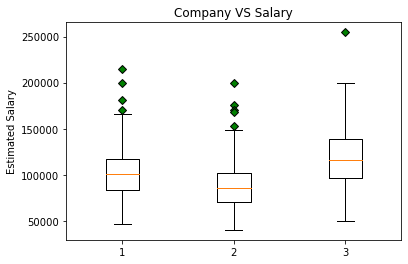

In [10]:
# Anam
# Plotting salary
green_diamond = dict(markerfacecolor='g', marker='D')
fig1, ax1 = plt.subplots()
ax1.set_title('Company VS Salary')
ax1.set_ylabel('Estimated Salary')
ax1.boxplot(company_salary, flierprops=green_diamond)
plt.show()

<AxesSubplot:>

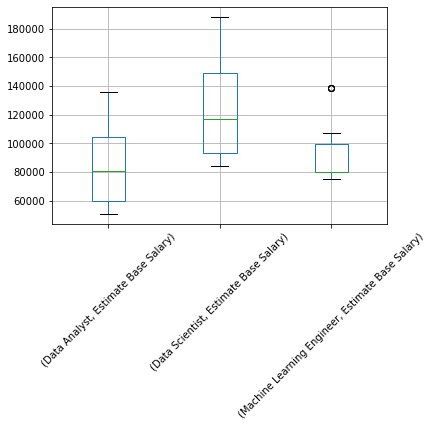

In [28]:
title_df=data_science_df['Job Title'].value_counts()
top_five=list(title_df.iloc[0:3].index)
# top_five
top_five=data_science_df[data_science_df["Job Title"].isin(top_five)][["Job Title", "Estimate Base Salary"]]
grouped_top_five=top_five.groupby("Job Title")
grouped_top_five
grouped_top_five.boxplot("Estimate Base Salary", rot=45)
# green_diamond = dict(markerfacecolor='g', marker='D')
# fig1, ax1 = plt.subplots()
# ax1.set_title('Company VS Salary')
# ax1.set_ylabel('Estimated Salary')
# ax1.boxplot(top_five, flierprops=green_diamond)
# plt.show()

In [ ]:
# Anam
# quartiles = company_salary.quantile([.25,.5,.75])
# lowerq = quartiles[0.25]
# upperq = quartiles[0.75]
# iqr = upperq-lowerq

# print(f"The lower quartile of salary is: {lowerq}")
# print(f"The upper quartile of salary is: {upperq}")
# print(f"The interquartile range of salary is: {iqr}")
# print(f"The the median of salary is: {quartiles[0.5]} ")

# lower_bound = lowerq - (1.5*iqr)
# upper_bound = upperq + (1.5*iqr)
# print(f"Values below {lower_bound} could be outliers.")
# print(f"Values above {upper_bound} could be outliers.")

In [29]:
# Anam
employee_satisfaction_opp=data_science_df.groupby(["Company"]).mean()["Company Career Opportinities"]
employee_satisfaction_benefits=data_science_df.groupby(["Company"]).mean()["Compensation and Benefits"]
employee_satisfaction_values=data_science_df.groupby(["Company"]).mean()["Company Culture and Values"]
employee_satisfaction_life=data_science_df.groupby(["Company"]).mean()["Company Work Life Balance"]                                                                 
employee_satisfaction=(employee_satisfaction_opp+employee_satisfaction_benefits+employee_satisfaction_values+employee_satisfaction_life)/4
# Employee satisfaction
employee_satisfaction=employee_satisfaction.sort_values(ascending=False)
top_employee_satisfaction=employee_satisfaction.iloc[0:5]
bottom_employee_satisfaction=employee_satisfaction.iloc[-5:]


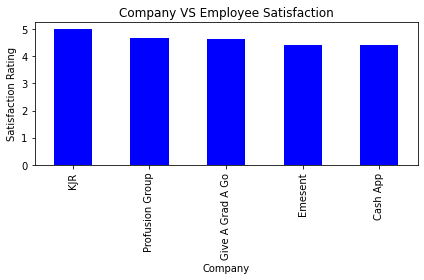

In [30]:
# Anam
# Bar plot
top_employee_satisfaction.plot.bar(color='b')
plt.title("Company VS Employee Satisfaction")
plt.xlabel("Company")
plt.ylabel("Satisfaction Rating")
plt.tight_layout()



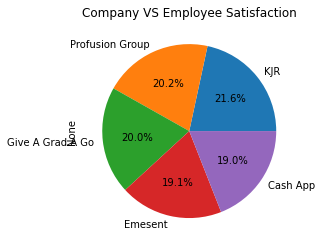

In [31]:
# Anam
# Pie plot
# top_employee_satisfaction.plot.pie(autopct= "%1.1f%%")
# plt.title("Company VS Employee Satisfaction")
# plt.show()

In [32]:
# Anam
# 7: Find the unique job titles and extract top 5 and bottom 5 job titles in terms of salary
job_title=data_science_df.groupby(["Job Title"]).mean()[["Estimate Base Salary"]]
job_title
job_title.sort_values("Estimate Base Salary", ascending=False)

,Estimate Base Salary
Job Title,
"Technical Fellow, Job Seeker",295000.000000
Senior Product Manager,209000.000000
Graduate Software Developer,196115.000000
Software Engineer,185573.307692
Lead Analytics Consultant,181275.000000
...,...
Brewer Trainee,54690.000000
Lead Group Manager,54387.000000
Lab Assistant,51997.000000


In [ ]:
# Nishant
# 8: Find the states with the highest and lowest number of job opportunities by using groupby method
grouped_state_jobs = data_science_df.groupby(["State"])["Job Title"]
state_jobs=grouped_state_jobs.count()
state_jobs

In [ ]:
# # Nishant
# #Creating pie charts for data science job oppertunities by states
state_jobs.plot.bar(color='b')
plt.title("Popular states with data science job opportunities")
plt.xlabel("States")
plt.ylabel("Number of Jobs")
plt.tight_layout()

In [ ]:
# Nishant
# 9: The popular company type and then make a pie chart
data_science_df['Company Type'] = data_science_df['Company Type'].replace(['Government'],'Company - Public')
private=data_science_df.loc[data_science_df['Company Type']=="Company - Private"]
public=data_science_df.loc[data_science_df['Company Type'] =="Company - Public"]
merged_company_type=pd.concat([private, public], ignore_index=True, sort=False)
company_df = merged_company_type.groupby(["Company Type"])["Company"]
company_type=company_df.count()
company_type

In [ ]:
# Nishant
# #Creating pie charts for data science job opportunities by popular company types
company_type.plot.pie(autopct= "%1.1f%%")
plt.title("Popular Company Type")
plt.show()

In [ ]:
# Anam
# public vs private estimate base salary
# company_df = merged_company_type.groupby(["Company Type"])["Estimate Base Salary"]
# # company_type=company_df.count()
# # company_type
# plt.scatter(x_axis, data, marker="o", facecolors="red", edgecolors="black", s=x_axis, 
# #             alpha=0.50)
# company_df.plot.bar(color='b')
# plt.title("Company VS Employee Satisfaction")
# plt.xlabel("Company")
# plt.ylabel("Satisfaction Rating")
# plt.tight_layout()

In [ ]:
# Nishant
#remove string from column
data_science_df['Company Size Int'] = data_science_df['Company Size'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

In [ ]:
# Nishant
# 10: Compare the size of the company using the bin and compare the salaries
#Creating bins for size of companies
bins = [0, 1000, 5000, 11000]

#Creating labels
# MNC=Multi-National Companies
group_size = ["Smaller", "Medium", "MNC"]

In [ ]:
# Nishant
data_science_df["Size Of Company"] = pd.cut(data_science_df["Company Size Int"], bins, labels=group_size, include_lowest=True)
data_science_df

In [ ]:
# Nishant
# 10: compare the salaries using the bin 
#creating bins for salary slot
bins = [0, 40000, 60000, 80000, 120000, 150000, 250000]
#creating labels
group_salary = ["Lowest", "Lower", "Average", "Good", "Higher", "Highest"]

In [ ]:
# Nishant
data_science_df["Estimated Salary"] = pd.cut(data_science_df["Estimate Base Salary"], bins, labels=group_salary, include_lowest=True)
data_science_df

In [ ]:
# John
# 11: Find top 15 and bottom 15 companies in terms of company ratings and employee satisfaction by setting conditions over 4.0

#Identifying Top 10 company

top_condition_rating = (data_science_df["Company Rating"]>=4)
top_condition_career = (data_science_df["Company Career Opportinities"]>=4)
top_condition_benefits = (data_science_df["Compensation and Benefits"]>=4)
top_condition_culture = (data_science_df["Company Culture and Values"]>=4)
top_condition_worklife = (data_science_df["Company Work Life Balance"]>=4)

top_conditional_df = data_science_df.loc[top_condition_rating & top_condition_career & 
                                         top_condition_benefits & top_condition_culture & top_condition_worklife].dropna()

t_company_df = top_conditional_df.groupby(["Company"]).mean()[["Company Rating","Company Career Opportinities","Compensation and Benefits","Company Culture and Values","Company Work Life Balance"]]

top_company_df= t_company_df.sort_values(["Company Rating"], ascending =False)

top_company_df.head(10)

In [ ]:
# John
#Identifying bottom 10 company

bottom_condition_rating = (data_science_df["Company Rating"]<4)
bottom_condition_career = (data_science_df["Company Career Opportinities"]<4)
bottom_condition_benefits = (data_science_df["Compensation and Benefits"]<4)
bottom_condition_culture = (data_science_df["Company Culture and Values"]<4)
bottom_condition_worklife = (data_science_df["Company Work Life Balance"]<4)

bottom_conditional_df = data_science_df.loc[bottom_condition_rating & bottom_condition_career & 
                                         bottom_condition_benefits & bottom_condition_culture & bottom_condition_worklife].dropna()

b_company_df = bottom_conditional_df.groupby(["Company"]).mean()[["Company Rating","Company Career Opportinities","Compensation and Benefits","Company Culture and Values","Company Work Life Balance"]]

bottom_company_df= b_company_df.sort_values(["Company Rating"], ascending =True)

bottom_company_df.head(10)

In [ ]:
# John
# 12: Define metro and regional by using conditional statements and find the number of opportunities in metro vs regional

filtered_data_science = (data_science_df["Job Location"]!= "Australia")

updated_data_science_df = data_science_df.loc[filtered_data_science]

per_job_location = updated_data_science_df.groupby(["Job Location"]).mean()["Estimate Base Salary"]

per_job_location

round(per_job_location,2)

In [ ]:
# John
# 12: Define metro and regional by using conditional statements and find the number of opportunities in metro vs regional

list_regional_location = ["Bella Vista","Bowen Hills", "Braeside", "Bridgetown", "Bunbury","Helensvale","Jandakot","Mile End","Smithton","Thebarton","Uxbridge","Waurn Ponds","Wollongong"]



regional_location = updated_data_science_df[updated_data_science_df["Job Location"].isin(list_regional_location)]


metro_location = updated_data_science_df[~updated_data_science_df["Job Location"].isin(list_regional_location)]


In [ ]:
# John
regional_location['Location Type'] = 'Regional'

metro_location['Location Type'] = 'Metro'

merged_location= pd.concat([metro_location, regional_location], ignore_index=True, sort=False)
merged_location

In [ ]:
# John
overall_location_salary = merged_location.groupby(["Location Type"]).mean()["Estimate Base Salary"]
overall_location_salary

round(overall_location_salary,2)

In [ ]:
# John
regional_salary = regional_location.groupby(["Job Location"]).mean()["Estimate Base Salary"]
regional_salary
round(regional_salary,2)

In [ ]:
# John
metro_salary = metro_location.groupby(["Job Location"]).mean()["Estimate Base Salary"]
metro_salary
round(metro_salary,2)

In [ ]:
# John
#Top 10 locations for data science jobs

def bar_plot(dataframe, column_name, num, Title, Xlabel):
  plt.figure(figsize=(15,7))
  color = plt.cm.Paired(np.arange(len(dataframe)))
  dataframe[column_name].value_counts().head(num).plot.bar(color=color, rot=90)
  plt.title(Title, fontsize=15)
  plt.xlabel(Xlabel, fontsize=15)
  plt.ylabel("Count", fontsize=15)
  plt.xticks(fontsize=10, rotation=80)
  plt.yticks(fontsize=10)

In [ ]:
# John
Title = "Top 10 Locations for Data Science Jobs"
Xlabel = "Location"
bar_plot(updated_data_science_df, 'Job Location', 10, Title, Xlabel)

In [ ]:
# John
Title = "Top 10 Metro Locations for Data Science Jobs"
Xlabel = "Location"
bar_plot(metro_location, 'Job Location', 10, Title, Xlabel)

In [ ]:
# John
Title = "Top 10 Regional Locations for Data Science Jobs"
Xlabel = "Location"
bar_plot(regional_location, 'Job Location', 10, Title, Xlabel)

In [ ]:
# John
st.pearsonr(company_data['Company Rating'],company_data['Estimate Base Salary'])[0]
correlation = st.pearsonr(company_data['Company Rating'],company_data['Estimate Base Salary'])[0]
correlation 

In [ ]:
# John
company_rating = data_science_df.loc[data_science_df["Company Rating"]>=2]


company_data = company_rating.groupby(['Company']).mean()

# calculate linear regression equation and add line/equation to plot
x_values = company_data ['Company Rating']
y_values = company_data['Estimate Base Salary']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(company_data['Company Rating'],company_data['Estimate Base Salary'], s=60, alpha=0.7, edgecolors="k")
b, a = np.polyfit(company_data ['Company Rating'],company_data['Estimate Base Salary'], deg=1)
# Plot regression line
ax.plot(company_data['Company Rating'], a + b * company_data ['Company Rating'], color="k", lw=2.5);

# Annotate linear regression
plt.annotate(line_eq,(4.6,120000),fontsize=15,color="red")

# Add labels and title to plot
plt.xlabel('Company Rating')
plt.ylabel('Estimate Base Salary')
plt.title("Average company rating vs. estimated base salary")

print(f"""The correlation for Average company rating vs. estimated base salary is {(correlation)}.""")

In [ ]:
# John
st.pearsonr(company_data['Company Rating'],company_data['Compensation and Benefits'])[0]
correlation = st.pearsonr(company_data['Company Rating'],company_data['Compensation and Benefits'])[0]
correlation 

In [ ]:
# John
company_rating = data_science_df.loc[data_science_df["Company Rating"]>=2]


company_data = company_rating.groupby(['Company']).mean()

# calculate linear regression equation and add line/equation to plot
x_values = company_data ['Company Rating']
y_values = company_data['Compensation and Benefits']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(company_data['Company Rating'],company_data['Compensation and Benefits'], s=60, alpha=0.7, edgecolors="k")
b, a = np.polyfit(company_data ['Company Rating'],company_data['Compensation and Benefits'], deg=1)
# Plot regression line
ax.plot(company_data['Company Rating'], a + b * company_data ['Company Rating'], color="k", lw=2.5);

# Annotate linear regression
plt.annotate(line_eq,(2.5,4.0),fontsize=15,color="red")

# Add labels and title to plot
plt.xlabel('Company Rating')
plt.ylabel('Compensation and Benefits')
plt.title("Average company rating vs. Compensation and Benefits rating")

print(f"""The correlation for Average company rating vs. Compensation and Benefits rating is {(correlation)}.""")

In [36]:
# Anam
# 13: Count for each technical skill and then find top 10
skills_df=data_science_df[['python_yn','r_yn','sql_yn','java_yn','julia_yn','scala_yn','c_yn','c++_yn','javascript_yn','spark_yn','hadoop_yn','matlab_yn','sas_yn','git_yn','excel_yn','nosql_yn','aws_yn','mongodb_yn','cassandra_yn','hive_yn','bigml_yn','tableau_yn','powerbi_yn','nlp_yn','pytorch_yn','tensorflow_yn','mathematic_yn','statistic_yn']]
skills_df.columns=['python','r','sql','java','julia','scala','c','c++','javascript','spark','hadoop','matlab','sas','git','excel','nosql','aws','mongodb','cassandra','hive','bigml','tableau','powerbi','nlp','pytorch','tensorflow','mathematic','statistic']

sum_df=skills_df.sum()
top=sum_df.sort_values(ascending=False)
top_ten_skills=top.iloc[0:10]
top_ten_skills

python        386
sql           338
mathematic    218
r             169
statistic     164
excel         162
aws           133
c++            98
tableau        94
powerbi        86
dtype: int64

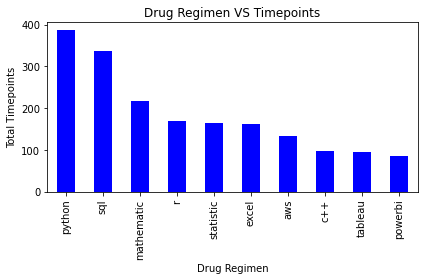

In [37]:
# Anam
top_ten_skills.plot.bar(color='b')
plt.title("Drug Regimen VS Timepoints")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Timepoints")
plt.tight_layout()

In [ ]:
# John
# 14: Bonus: Try using gmaps API to create a heatmap that we can use to visualize which states have more employment opportunities when it comes to data science.